In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
datasets = ["Consumption Pyramids", "Household income"]
datasets_lower = [dataset.lower().replace(" ", "_") for dataset in datasets]


dfs = {}
df = pd.read_pickle(f"venv/pickles/household_income_karnataka.pickle")

# Initialize the dictionary for "household_income"
dfs["household_income"] = {}
# Add the dataframe to the "karnataka" key under "household_income"
dfs["household_income"]["karnataka"] = df


In [39]:
agri_groups = ["Organised Farmers", "Agricultural Labourers", "Small/Marginal Farmers"]


In [40]:
dfi = dfs["household_income"]


In [41]:
print(dfi["karnataka"].columns.tolist())


['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM', 'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE', 'FAMILY_SHIFTED', 'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS', 'HH_WEIGHT_FOR_STATE_MS', 'HH_NON_RESPONSE_MS', 'HH_NON_RESPONSE_FOR_COUNTRY_MS', 'HH_NON_RESPONSE_FOR_STATE_MS', 'AGE_GROUP', 'OCCUPATION_GROUP', 'EDUCATION_GROUP', 'GENDER_GROUP', 'SIZE_GROUP', 'TOTAL_INCOME', 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES', 'INCOME_OF_ALL_MEMBERS_FROM_WAGES', 'INCOME_OF_ALL_MEMBERS_FROM_PENSION', 'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND', 'INCOME_OF_ALL_MEMBERS_FROM_INTEREST', 'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INSURANCE', 'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT', 'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION', 'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS', 'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS', 'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT', 'INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET', 'INCOME_OF_HOUSEHOLD_FROM_GAMBLING', 'date_col

In [42]:
for location, df in dfi.items():
    # Convert the dates from "%b %Y" to YYYY-MM format
    df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")

In [43]:
# Select all farmers and agricultural OCCUPATION_GROUP
farmers = {}
for location, df in dfi.items():
    farmers[location] = df[df["OCCUPATION_GROUP"].isin(agri_groups)]

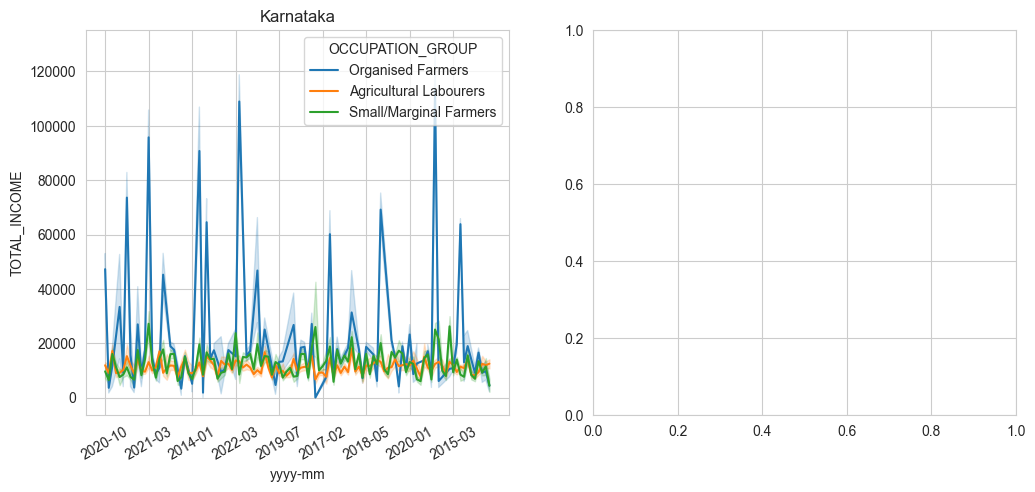

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of income over time according to the different OCCUPATION_GROUPs
for i, (location, df) in enumerate(farmers.items()):
    # df = df.reset_index()
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="yyyy-mm", y="TOTAL_INCOME", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    # Set x-axis to show every 12 months. Rotate the labels 45 degrees.
    axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=30)
plt.savefig(f"venv/images/income_over_time.png", dpi=200)

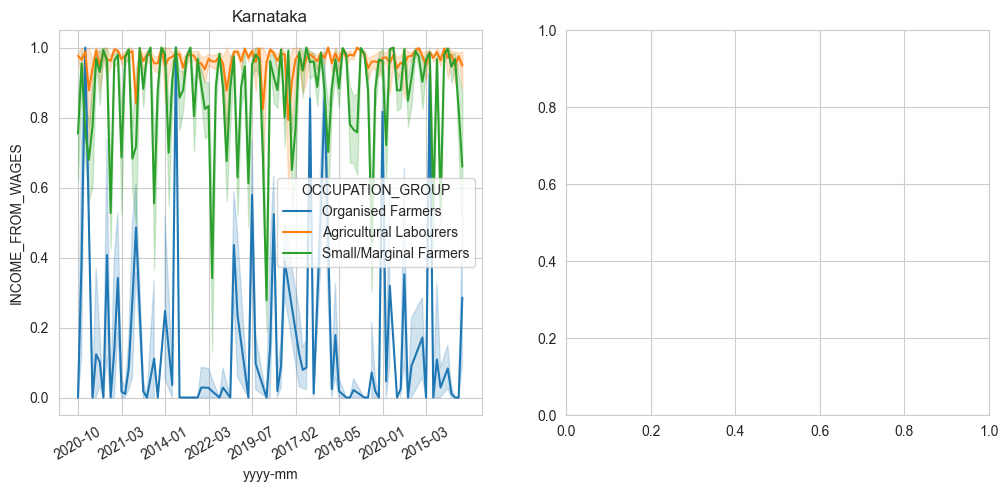

In [45]:
# Plot the percentage of income from wages (INCOME_OF_ALL_MEMBERS_FROM_WAGES divided by TOTAL_INCOME)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (location, df) in enumerate(farmers.items()):
    df = df.reset_index()
    df["INCOME_FROM_WAGES"] = df["INCOME_OF_ALL_MEMBERS_FROM_WAGES"] / df["TOTAL_INCOME"]
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="yyyy-mm", y="INCOME_FROM_WAGES", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=30)
plt.savefig(f"venv/images/income_from_wages.png", dpi=200)

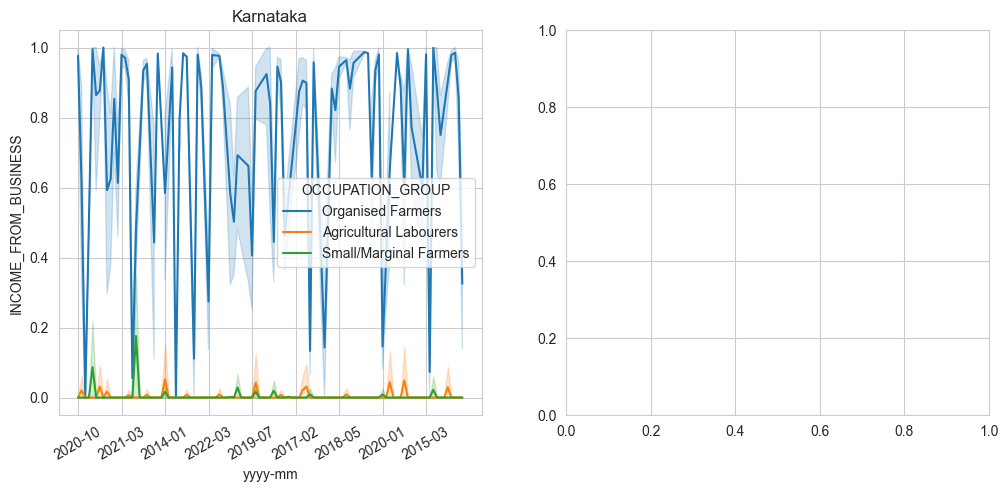

In [46]:
# Same for INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (location, df) in enumerate(farmers.items()):
    df = df.reset_index()
    df["INCOME_FROM_BUSINESS"] = df["INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT"] / df["TOTAL_INCOME"]
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="yyyy-mm", y="INCOME_FROM_BUSINESS", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=30)
plt.savefig(f"venv/images/income_from_business.png", dpi=200)

*Consumption Data*

In [47]:
datasets = ["Consumption Pyramids", "Household income"]
datasets_lower = [dataset.lower().replace(" ", "_") for dataset in datasets]


dfs = {}
df = pd.read_pickle(f"venv/pickles/consumption_data_karnataka.pickle")

# Initialize the dictionary for "household_income"
dfs["consumption_pyramids"] = {}
# Add the dataframe to the "karnataka" key under "household_income"
dfs["consumption_pyramids"]["karnataka"] = df

In [48]:
dfc = dfs["consumption_pyramids"]

In [49]:
main_columns = ["TOTAL_EXPENDITURE", "MONTHLY_EXPENSE_ON_FOOD", "MONTHLY_EXPENSE_ON_CLOTHING_AND_FOOTWEAR", "MONTHLY_EXPENSE_ON_COSMETIC_AND_TOILETRIES", "MONTHLY_EXPENSE_ON_APPLIANCES", "MONTHLY_EXPENSE_ON_RESTAURANTS", "MONTHLY_EXPENSE_ON_RECREATION", "MONTHLY_EXPENSE_ON_BILLS_AND_RENT", "MONTHLY_EXPENSE_ON_POWER_AND_FUEL", "MONTHLY_EXPENSE_ON_TRANSPORT", "MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO", "MONTHLY_EXPENSE_ON_EDUCATION", "MONTHLY_EXPENSE_ON_HEALTH", "MONTHLY_EXPENSE_ON_ALL_EMIS", "MONTHLY_EXPENSE_ON_MISCELLANEOUS"]


In [50]:
# Keep only the first 23 columns and the main columns
for location, df in dfc.items():
    columns_to_keep = df.columns[:23].tolist() + main_columns
    dfc[location] = df[columns_to_keep]

In [51]:
farmers2 = {}
for location, df in dfc.items():
    farmers2[location] = df[df["OCCUPATION_GROUP"].isin(agri_groups)]

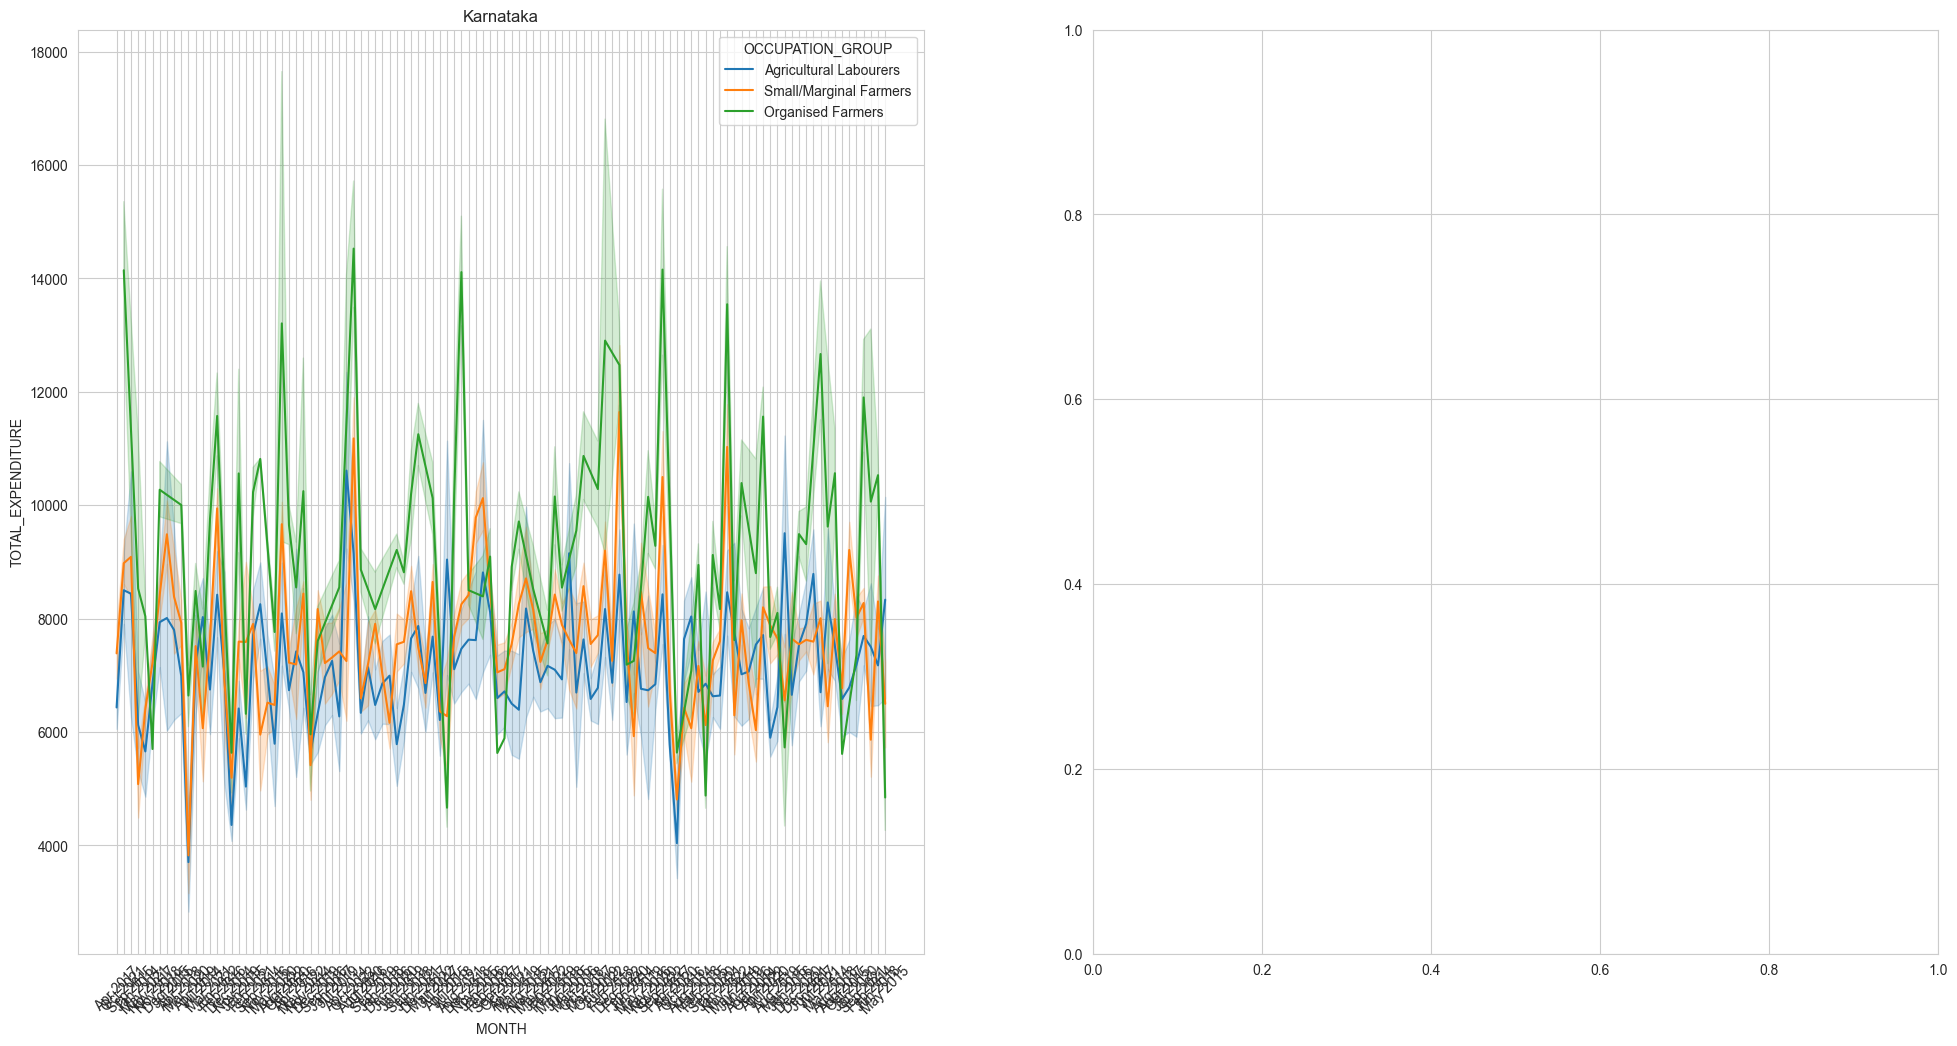

In [52]:
# Create a plot to compare the total expenditure of different agricultural groups
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

for i, (location, df) in enumerate(farmers2.items()):
    df = df.reset_index()
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="MONTH", y="TOTAL_EXPENDITURE", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    # axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=45)
plt.savefig(f"venv/images/expenditure_over_time.png", dpi=200)

In [53]:
temp_df2 = farmers2["karnataka"].copy()
temp_df2.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,MONTHLY_EXPENSE_ON_RESTAURANTS,MONTHLY_EXPENSE_ON_RECREATION,MONTHLY_EXPENSE_ON_BILLS_AND_RENT,MONTHLY_EXPENSE_ON_POWER_AND_FUEL,MONTHLY_EXPENSE_ON_TRANSPORT,MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO,MONTHLY_EXPENSE_ON_EDUCATION,MONTHLY_EXPENSE_ON_HEALTH,MONTHLY_EXPENSE_ON_ALL_EMIS,MONTHLY_EXPENSE_ON_MISCELLANEOUS
90585,94762800,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,0,0,100,770,110,200,0,130,0,0
90586,64280047,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,0,0,100,800,100,200,0,180,0,0
90587,79586257,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,0,0,100,770,120,200,0,150,0,0
90588,73429517,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,0,0,100,770,130,200,0,150,0,0
90593,60248833,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,0,0,100,770,150,200,0,150,0,0


In [54]:
temp_df2['necessities'] = (temp_df2['MONTHLY_EXPENSE_ON_FOOD'] +
                           temp_df2['MONTHLY_EXPENSE_ON_CLOTHING_AND_FOOTWEAR'] +
                           temp_df2['MONTHLY_EXPENSE_ON_BILLS_AND_RENT'] +
                           temp_df2['MONTHLY_EXPENSE_ON_POWER_AND_FUEL'] +
                           temp_df2['MONTHLY_EXPENSE_ON_TRANSPORT'] +
                           temp_df2['MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO'])

temp_df2['education'] = temp_df2['MONTHLY_EXPENSE_ON_EDUCATION']

temp_df2['luxuries'] = (temp_df2['MONTHLY_EXPENSE_ON_COSMETIC_AND_TOILETRIES'] +
                        temp_df2['MONTHLY_EXPENSE_ON_APPLIANCES'] +
                        temp_df2['MONTHLY_EXPENSE_ON_RESTAURANTS'] +
                        temp_df2['MONTHLY_EXPENSE_ON_RECREATION'] +
                        temp_df2['MONTHLY_EXPENSE_ON_ALL_EMIS'] +
                        temp_df2['MONTHLY_EXPENSE_ON_MISCELLANEOUS'])

temp_df2['health'] = temp_df2['MONTHLY_EXPENSE_ON_HEALTH']


In [55]:
temp_df2.head()


,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,MONTHLY_EXPENSE_ON_TRANSPORT,MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO,MONTHLY_EXPENSE_ON_EDUCATION,MONTHLY_EXPENSE_ON_HEALTH,MONTHLY_EXPENSE_ON_ALL_EMIS,MONTHLY_EXPENSE_ON_MISCELLANEOUS,necessities,education,luxuries,health
90585,94762800,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,110,200,0,130,0,0,5650,0,430,130
90586,64280047,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,100,200,0,180,0,0,6060,0,570,180
90587,79586257,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,120,200,0,150,0,0,5510,0,450,150
90588,73429517,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,130,200,0,150,0,0,5570,0,550,150
90593,60248833,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jun 2017,Apr 2017,Accepted,...,150,200,0,150,0,0,5570,0,460,150


In [56]:
# Get the list of unique occupation groups
occ_groups = df["OCCUPATION_GROUP"].unique()

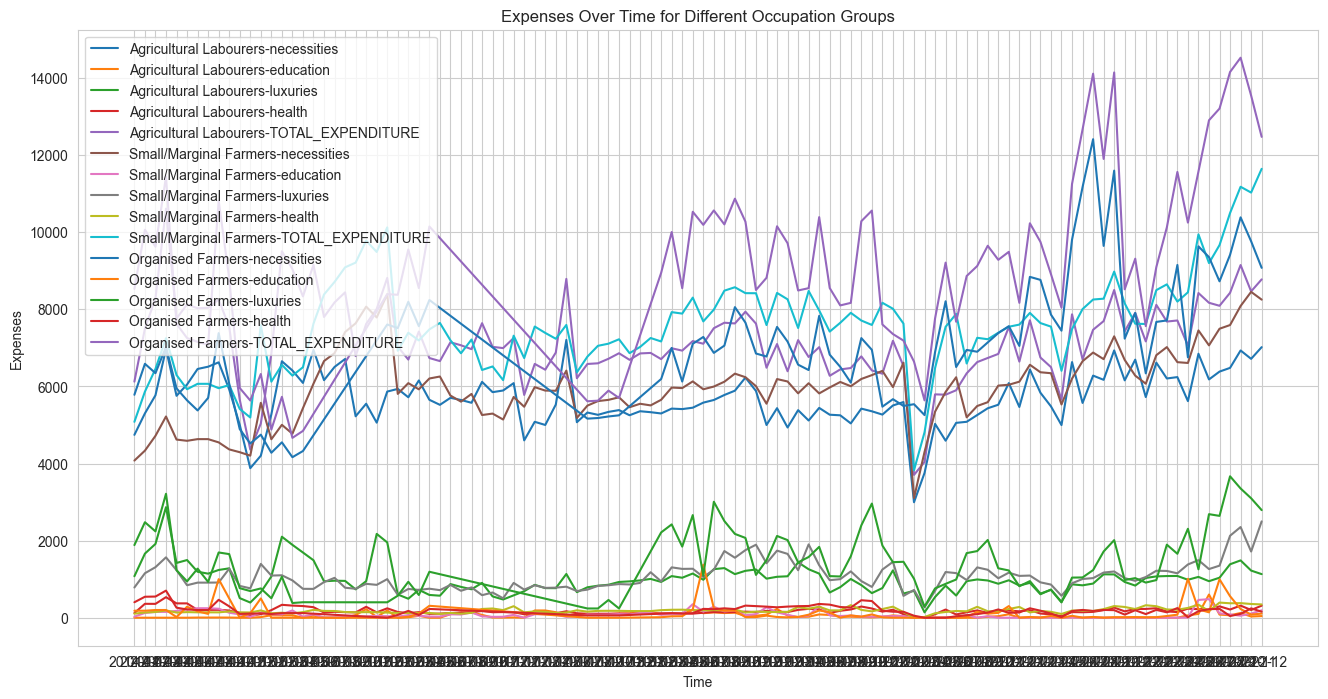

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

df = farmers2["karnataka"].copy()
df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")

df['necessities'] = (df['MONTHLY_EXPENSE_ON_FOOD'] +
                     df['MONTHLY_EXPENSE_ON_CLOTHING_AND_FOOTWEAR'] +
                     df['MONTHLY_EXPENSE_ON_BILLS_AND_RENT'] +
                     df['MONTHLY_EXPENSE_ON_POWER_AND_FUEL'] +
                     df['MONTHLY_EXPENSE_ON_TRANSPORT'] +
                     df['MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO'])

df['education'] = df['MONTHLY_EXPENSE_ON_EDUCATION']

df['luxuries'] = (df['MONTHLY_EXPENSE_ON_COSMETIC_AND_TOILETRIES'] +
                  df['MONTHLY_EXPENSE_ON_APPLIANCES'] +
                  df['MONTHLY_EXPENSE_ON_RESTAURANTS'] +
                  df['MONTHLY_EXPENSE_ON_RECREATION'] +
                  df['MONTHLY_EXPENSE_ON_ALL_EMIS'] +
                  df['MONTHLY_EXPENSE_ON_MISCELLANEOUS'])

df['health'] = df['MONTHLY_EXPENSE_ON_HEALTH']


main_columns = ["necessities", "education", "luxuries", "health", "TOTAL_EXPENDITURE"]

# Create a DataFrame for each occupation group
dfs = [df[df["OCCUPATION_GROUP"] == occ_group].groupby("yyyy-mm")[main_columns].mean() for occ_group in occ_groups]

# Plot data
for i, occ_group in enumerate(occ_groups):
    for main_column in main_columns:
        ax.plot(dfs[i].index, dfs[i][main_column], label=f'{occ_group}-{main_column}')

# Configure the plot
ax.set_xlabel('Time')
ax.set_ylabel('Expenses')
ax.set_title('Expenses Over Time for Different Occupation Groups')
ax.legend()


plt.show()



In [58]:
temp_df1 = farmers["karnataka"].copy()
temp_df1.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION,INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS,INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT,INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET,INCOME_OF_HOUSEHOLD_FROM_GAMBLING,date_collected,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_NGO,yyyy-mm
95278,94762800,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,Accepted,...,0,0,0.0,18000,0.0,0.0,income,NaN,NaN,2020-10
95286,60248833,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,Accepted,...,395,0,0.0,0,0.0,0.0,income,NaN,NaN,2020-10
95287,53631934,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,Accepted,...,0,0,0.0,22000,0.0,0.0,income,NaN,NaN,2020-10
95288,62962649,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,Accepted,...,0,0,0.0,20000,0.0,0.0,income,NaN,NaN,2020-10
95294,15094346,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9715,Jan 2021,Oct 2020,Accepted,...,0,0,0.0,25000,0.0,0.0,income,NaN,NaN,2020-10


In [59]:
merged_df = pd.merge(temp_df1, temp_df2[['HH_ID', 'MONTH', 'TOTAL_EXPENDITURE', 'necessities', 'education', 'luxuries']], on=['HH_ID', 'MONTH'], how='left')


In [60]:
merged_df.tail()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET,INCOME_OF_HOUSEHOLD_FROM_GAMBLING,date_collected,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_NGO,yyyy-mm,TOTAL_EXPENDITURE,necessities,education,luxuries
14167,58952556,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_11747,Mar 2021,Jan 2021,Accepted,...,0.0,0.0,income,NaN,NaN,2021-01,7630,6040,0,940
14168,12260847,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_11747,Mar 2021,Jan 2021,Accepted,...,0.0,0.0,income,NaN,NaN,2021-01,8010,5940,0,1310
14169,42908107,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_11748,Mar 2021,Jan 2021,Accepted,...,0.0,0.0,income,NaN,NaN,2021-01,6538,5595,0,813
14170,88866873,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_11748,Mar 2021,Jan 2021,Accepted,...,0.0,0.0,income,NaN,NaN,2021-01,6685,5770,0,785
14171,18162781,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_11748,Mar 2021,Jan 2021,Accepted,...,0.0,0.0,income,NaN,NaN,2021-01,8342,6875,0,1142


In [61]:
print(merged_df.columns)


Index(['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM', 'PSU_ID',
       'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE',
       'FAMILY_SHIFTED', 'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS',
       'HH_WEIGHT_FOR_STATE_MS', 'HH_NON_RESPONSE_MS',
       'HH_NON_RESPONSE_FOR_COUNTRY_MS', 'HH_NON_RESPONSE_FOR_STATE_MS',
       'AGE_GROUP', 'OCCUPATION_GROUP', 'EDUCATION_GROUP', 'GENDER_GROUP',
       'SIZE_GROUP', 'TOTAL_INCOME', 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
       'INCOME_OF_ALL_MEMBERS_FROM_WAGES',
       'INCOME_OF_ALL_MEMBERS_FROM_PENSION',
       'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND',
       'INCOME_OF_ALL_MEMBERS_FROM_INTEREST',
       'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INSURANCE',
       'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT',
       'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
       'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
       'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS',
       'INCOME_OF_HOU

In [62]:
# assuming 'column1' and 'column2' are the columns to be dropped
merged_df = merged_df.drop(['RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE',
       'FAMILY_SHIFTED', 'INCOME_OF_ALL_MEMBERS_FROM_WAGES', 'date_collected'], axis=1)


In [63]:
merged_df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,HH_WEIGHT_MS,...,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT,INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET,INCOME_OF_HOUSEHOLD_FROM_GAMBLING,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_NGO,yyyy-mm,TOTAL_EXPENDITURE,necessities,education,luxuries
0,94762800,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,3859.098108,...,18000,0.0,0.0,NaN,NaN,2020-10,7860,4965,0,1980
1,60248833,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,3859.098108,...,0,0.0,0.0,NaN,NaN,2020-10,8490,5995,900,1055
2,53631934,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,3859.098108,...,22000,0.0,0.0,NaN,NaN,2020-10,8545,6140,0,1830
3,62962649,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9714,Jan 2021,Oct 2020,3859.098108,...,20000,0.0,0.0,NaN,NaN,2020-10,9130,6625,0,1860
4,15094346,Karnataka,HR 59,Chitradurga,RURAL,HR 59_RURAL_R,PSU_ID_9715,Jan 2021,Oct 2020,3859.098108,...,25000,0.0,0.0,NaN,NaN,2020-10,7825,5530,0,1720


In [64]:
num_rows = merged_df.shape[0]
print(f"The number of rows in the DataFrame is {num_rows}")

The number of rows in the DataFrame is 14172


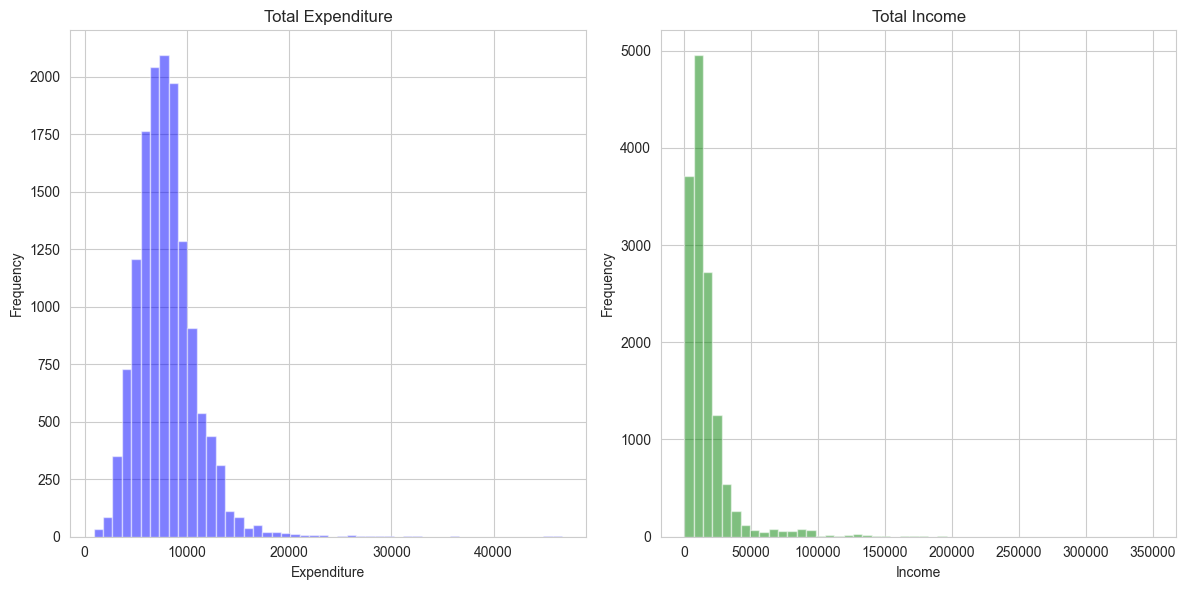

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(merged_df['TOTAL_EXPENDITURE'], bins=50, color='blue', alpha=0.5)
axes[0].set_title('Total Expenditure')
axes[0].set_xlabel('Expenditure')
axes[0].set_ylabel('Frequency')

axes[1].hist(merged_df['TOTAL_INCOME'], bins=50, color='green', alpha=0.5)
axes[1].set_title('Total Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

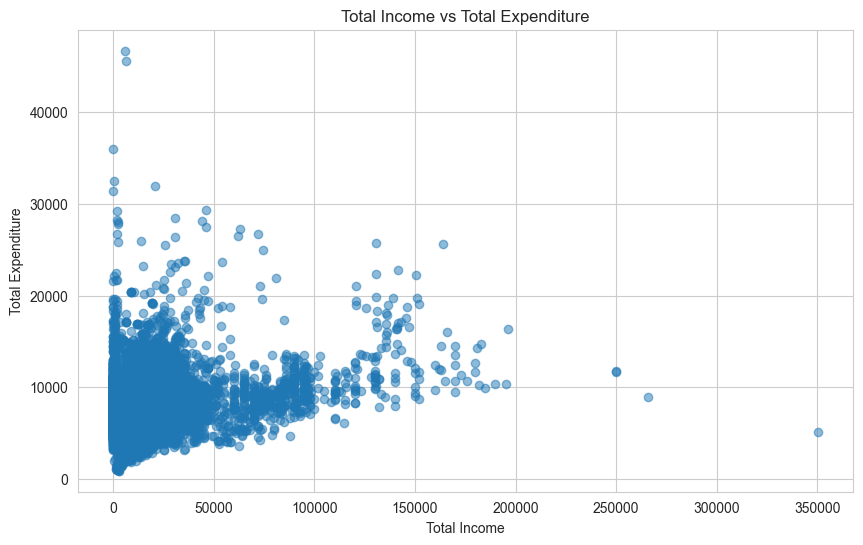

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['TOTAL_INCOME'], merged_df['TOTAL_EXPENDITURE'], alpha=0.5)
plt.title('Total Income vs Total Expenditure')
plt.xlabel('Total Income')
plt.ylabel('Total Expenditure')
plt.grid(True)
plt.show()

In [67]:
df_long = merged_df.melt(id_vars='MONTH', value_vars=['TOTAL_EXPENDITURE', 'TOTAL_INCOME'], var_name='Type', value_name='Value')


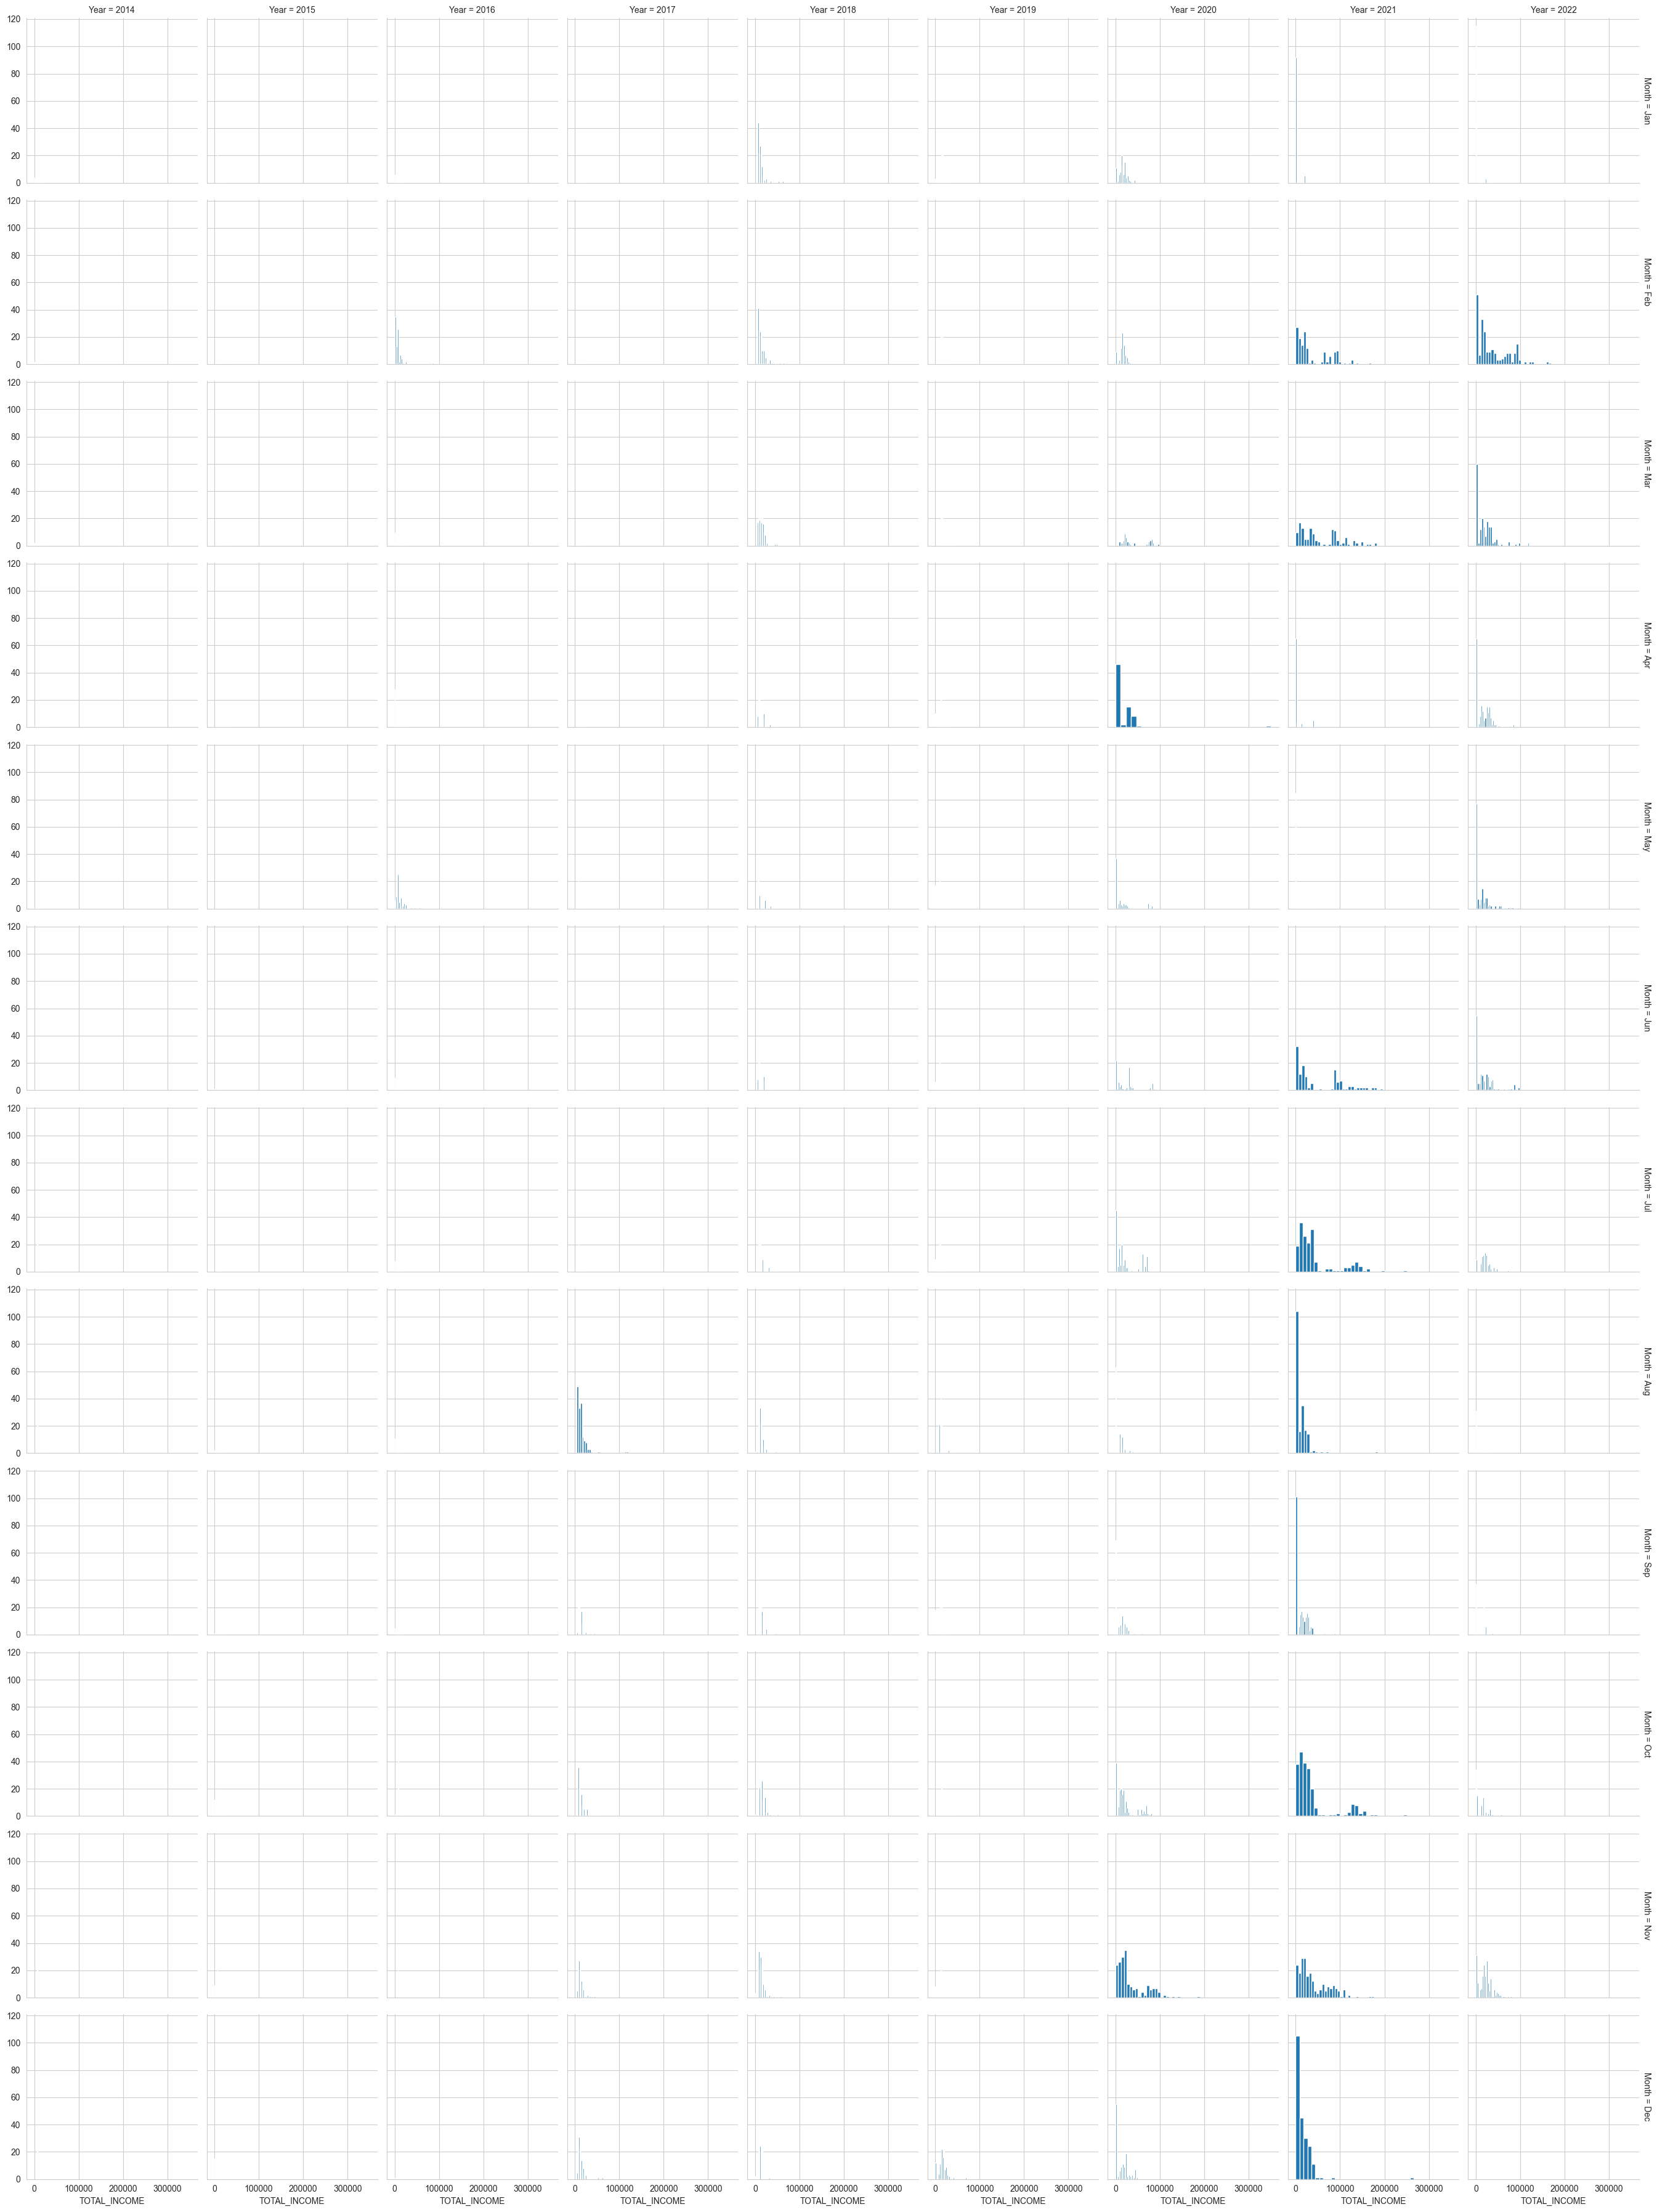

In [68]:
# Convert 'MONTH' to datetime format and extract month and year
merged_df['MONTH'] = pd.to_datetime(merged_df['MONTH'], format='%b %Y')
merged_df['Year'] = merged_df['MONTH'].dt.year
merged_df['Month'] = merged_df['MONTH'].dt.strftime('%b')  # This will give month in abbreviated form (Jan, Feb, etc.)

# Sort dataframe by 'MONTH'
merged_df.sort_values('MONTH', inplace=True)

# Create FacetGrid
g = sns.FacetGrid(merged_df, col="Year", row="Month", margin_titles=True)
g.map(plt.hist, "TOTAL_INCOME", bins=30)

plt.show()

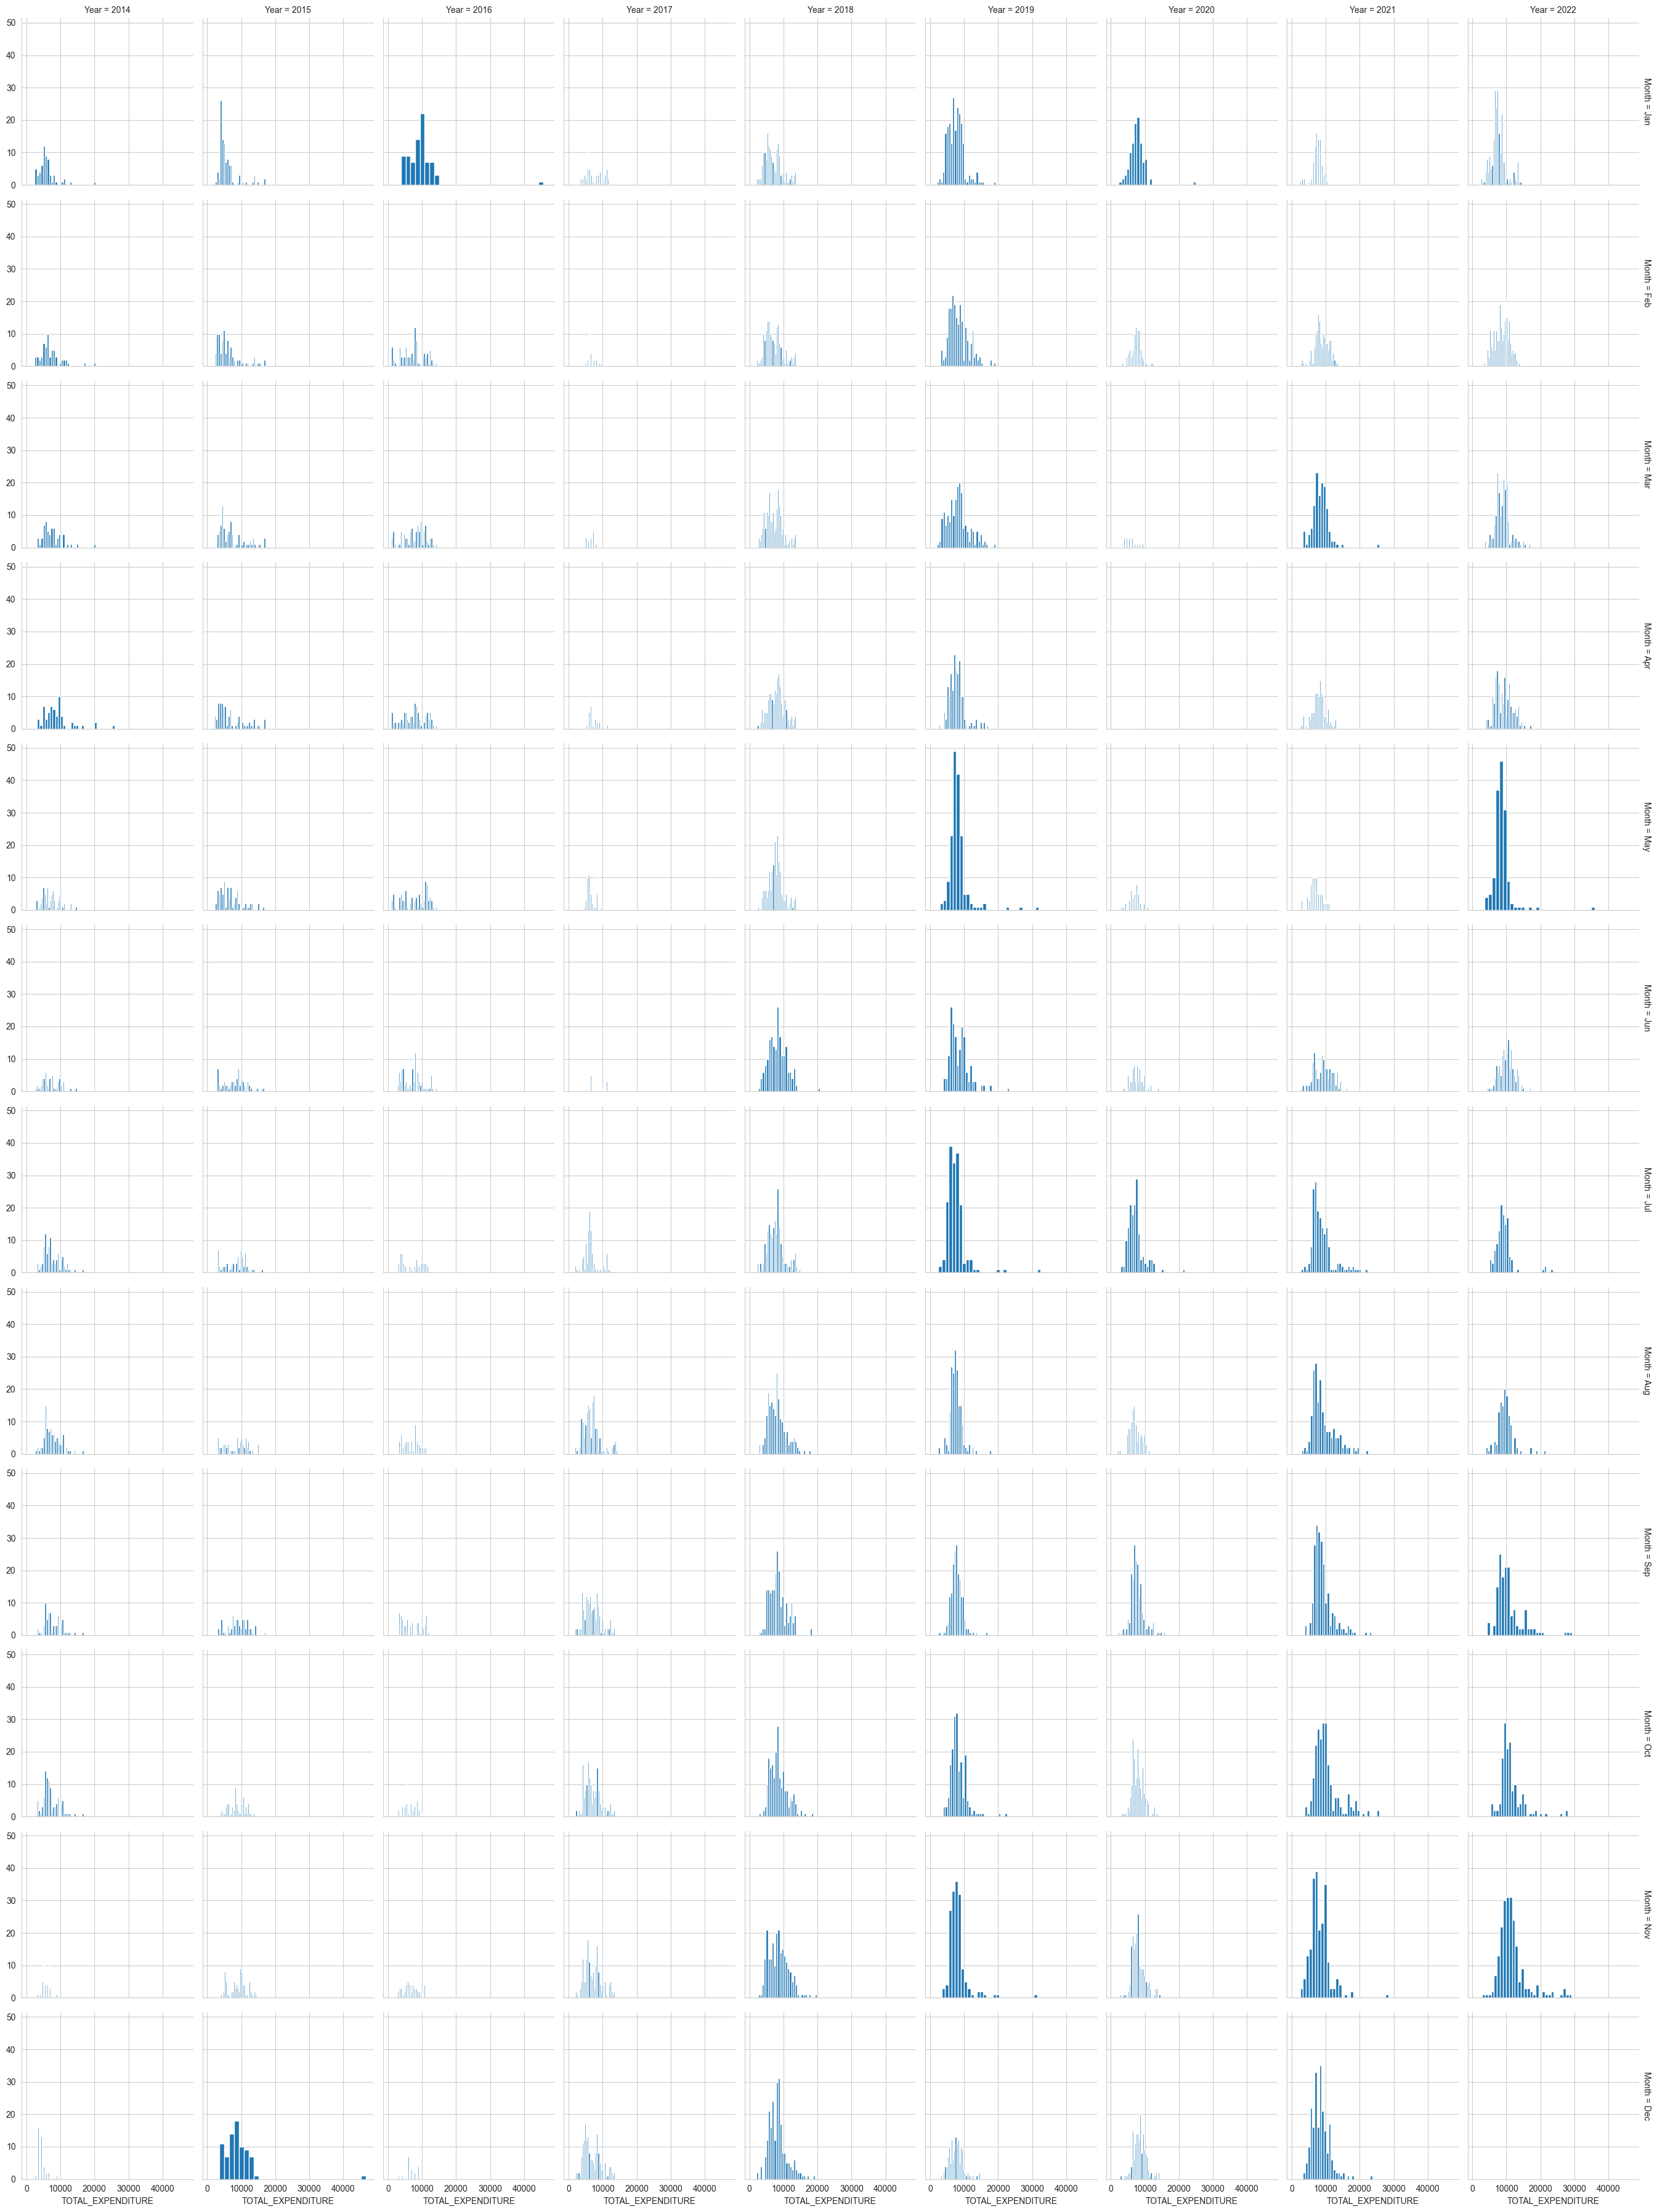

In [69]:
g = sns.FacetGrid(merged_df, col="Year", row="Month", margin_titles=True)
g.map(plt.hist, "TOTAL_EXPENDITURE", bins=30)

plt.show()

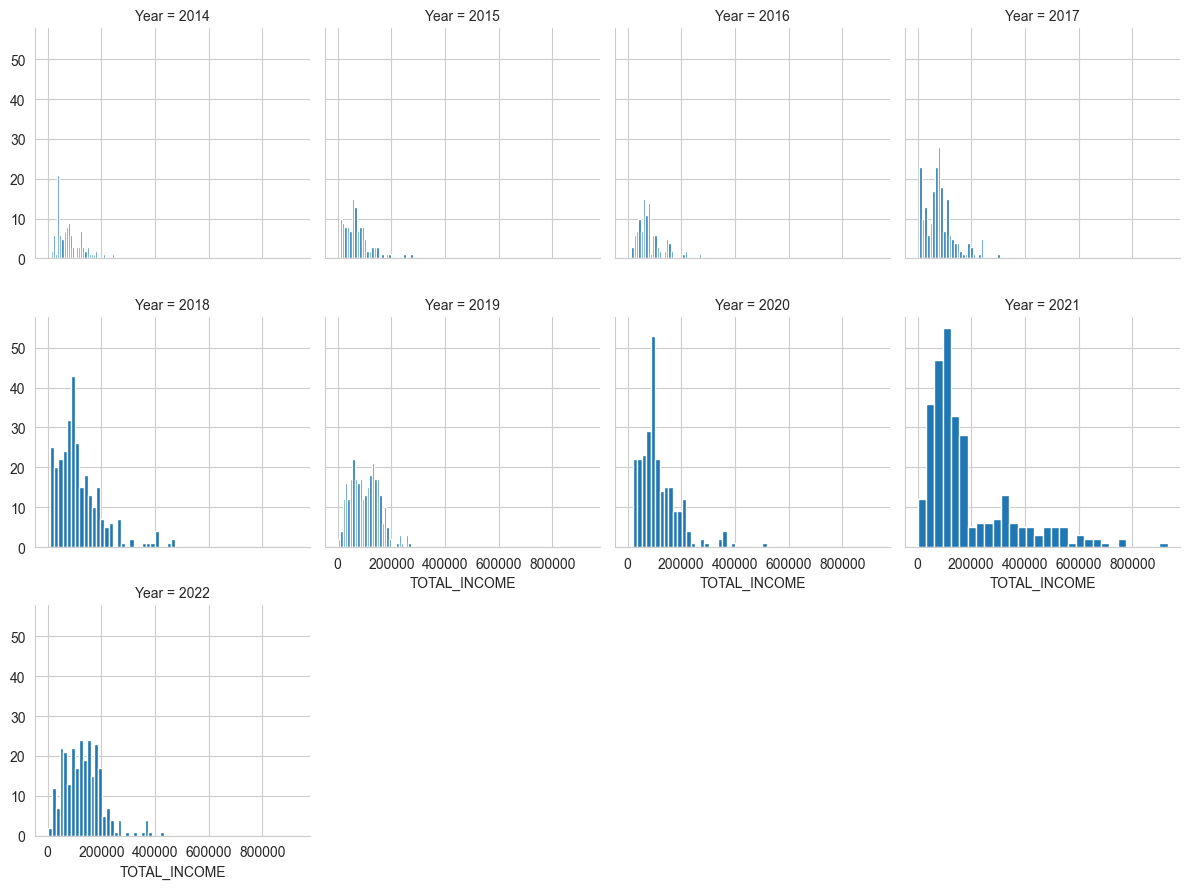

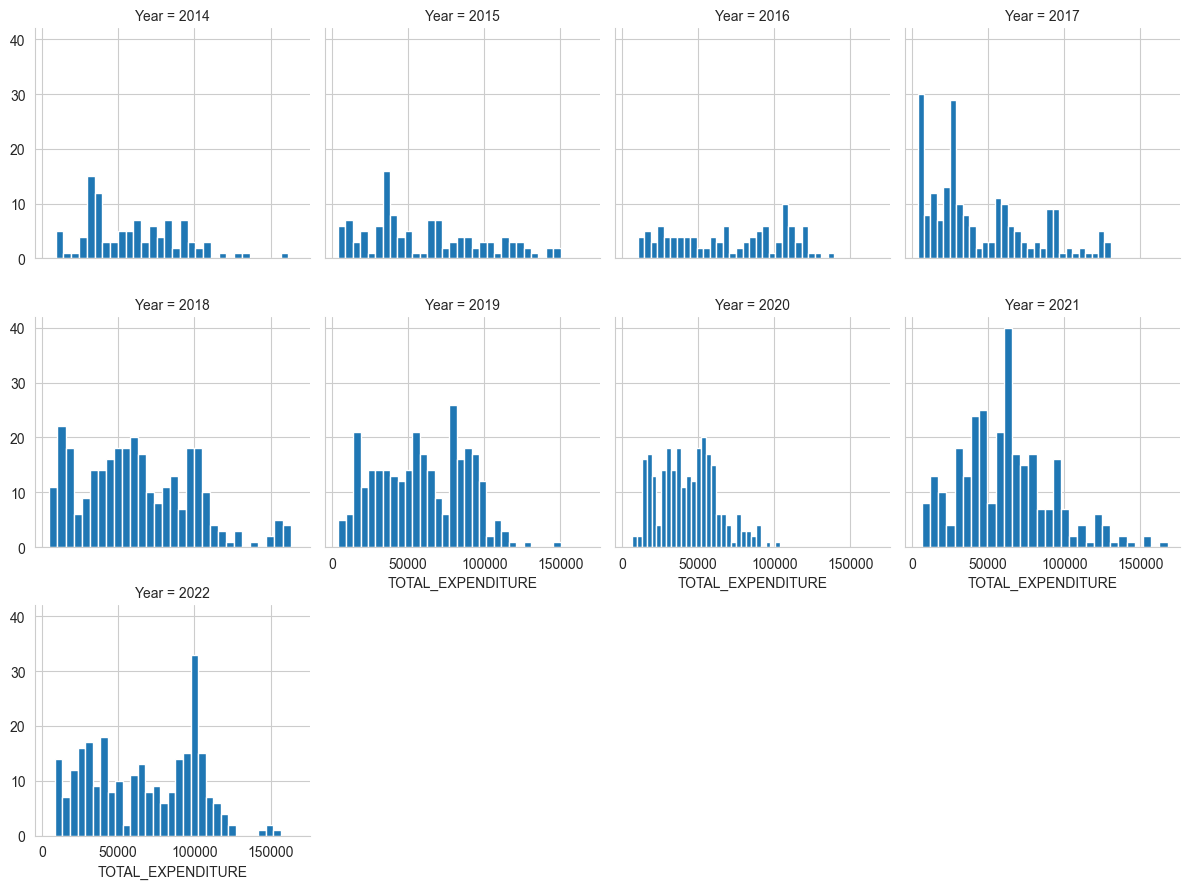

In [70]:
# Convert 'MONTH' to datetime format and extract year
merged_df['MONTH'] = pd.to_datetime(merged_df['MONTH'], format='%b %Y')
merged_df['Year'] = merged_df['MONTH'].dt.year

# Sum income and expenditure for each household for each year
annual_df = merged_df.groupby(['Year', 'HH_ID'])[['TOTAL_INCOME', 'TOTAL_EXPENDITURE']].sum().reset_index()

# Create FacetGrid for 'TOTAL_INCOME'
g = sns.FacetGrid(annual_df, col="Year", col_wrap=4, margin_titles=True)
g.map(plt.hist, "TOTAL_INCOME", bins=30)

plt.show()

# Create FacetGrid for 'TOTAL_EXPENDITURE'
g = sns.FacetGrid(annual_df, col="Year", col_wrap=4, margin_titles=True)
g.map(plt.hist, "TOTAL_EXPENDITURE", bins=30)

plt.show()

In [71]:
merged_df.to_pickle('venv/pickles/income_and_expenditure.pkl')


['HH_ID',
 'STATE',
 'HR',
 'DISTRICT',
 'REGION_TYPE',
 'STRATUM',
 'PSU_ID',
 'MONTH_SLOT',
 'MONTH',
 'HH_WEIGHT_MS',
 'HH_WEIGHT_FOR_COUNTRY_MS',
 'HH_WEIGHT_FOR_STATE_MS',
 'HH_NON_RESPONSE_MS',
 'HH_NON_RESPONSE_FOR_COUNTRY_MS',
 'HH_NON_RESPONSE_FOR_STATE_MS',
 'AGE_GROUP',
 'OCCUPATION_GROUP',
 'EDUCATION_GROUP',
 'GENDER_GROUP',
 'SIZE_GROUP',
 'TOTAL_INCOME',
 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
 'INCOME_OF_ALL_MEMBERS_FROM_PENSION',
 'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND',
 'INCOME_OF_ALL_MEMBERS_FROM_INTEREST',
 'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INSURANCE',
 'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES',
 'INCOME_OF_HOUSEHOLD_FROM_RENT',
 'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
 'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
 'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS',
 'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT',
 'INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET',
 'INCOME_OF_HOUSEHOLD_FROM_GAMBLING',
 'INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT',
 'INCOME_OF_H